# Heart Failure Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 데이터 표준정규분포로 변환 >> 평균 0, 표준편차 1
from sklearn.preprocessing import StandardScaler

# 학습 set과 테스트 set으로 나눔
from sklearn.model_selection import train_test_split

# 모델의 학습 결과 확인
from sklearn.metrics import classification_report

# 분류 모델
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0




1.   age: 나이
2.   anaemia: 빈혈증 여부(0: 정상, 1: 빈혈)
3.   creatinine_phosphokinase: 크레아티닌키나제 검사 결과
4.   diabetes: 당뇨병 여부(0: 정상, 1: 당뇨)
5.   ejection_fraction: 박출계수(단위: %)
6.   high_blood_pressure: 고혈압 여부(0: 정상, 1: 고혈압)
7.   platelets: 혈소판 수(단위: kiloplatelets/mL)
8.   serum_creatinine: 혈중 크레아티닌 수치(단위: mg/dL)
9.   serum_sodium: 혈중 나트륨 수치(단위: mEq/L)
10.  sex: 성별(0: 여자, 1: 남자)
11.  smoking: 흡연 여부(0: 비흡연, 1: 흡연)
12.  time: 관찰 기간(단위: 일)
13.  DEATH_EVENT: 사망 여부(0: 생존, 1: 사망)



데이터 살펴보기

In [ ]:
dataset.head(n=10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [ ]:
print(dataset.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


결측치(Missing Value)는 없다.

# 데이터 분석
여러 변수들과 사망(DEATH_EVENT)과의 관계를 파악

In [ ]:
print(dataset.describe())

              age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]


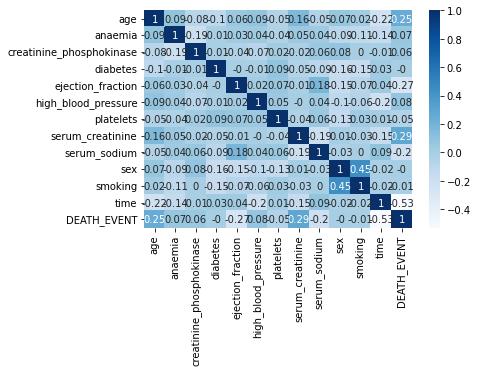

<Figure size 2880x2880 with 0 Axes>

In [ ]:
sns.heatmap(round(dataset.corr(), 2), annot=True, cmap='Blues')
plt.figure(figsize=(40,40))
plt.show()

1. age와 DEATH

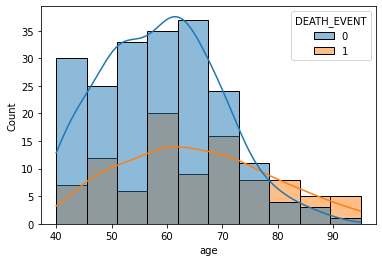

In [ ]:
sns.histplot(x='age', data=dataset, hue='DEATH_EVENT', kde=True)
plt.show()

나이가 많을수록 사망률이 더 높다.

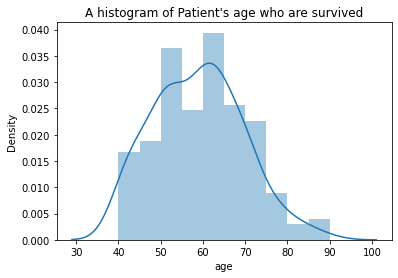

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==0]['age'])
plt.title("A histogram of Patient's age who are survived")
plt.show()

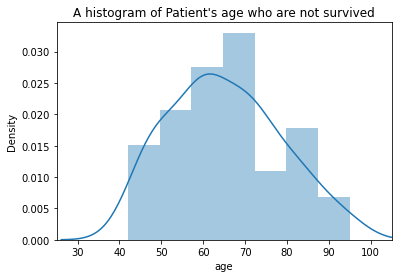

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==1]['age'])
plt.xlim([25,105])
plt.title("A histogram of Patient's age who are not survived")
plt.show()

2. anaemia(빈혈증 여부)와 DEATH

Death Rate of patient who have no anaemia: 0.29411764705882354
Death Rate of patient who have anaemia: 0.35658914728682173


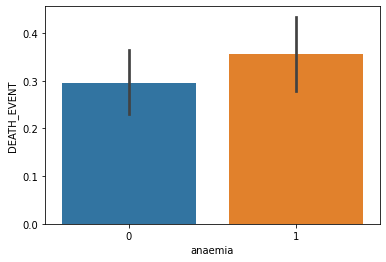

In [ ]:
non_anaemia = dataset[dataset['anaemia']==0]['DEATH_EVENT'].mean()
have_anaemia = dataset[dataset['anaemia']==1]['DEATH_EVENT'].mean()

print("Death Rate of patient who have no anaemia: {}".format(non_anaemia))
print("Death Rate of patient who have anaemia: {}".format(have_anaemia))

sns.barplot(dataset['anaemia'], dataset['DEATH_EVENT'])
plt.show()

빈혈이 있는 환자의 사망률이 더 높다.

3. creatinine_phosphokinase(크레아티닌 키나제)와 DEATH

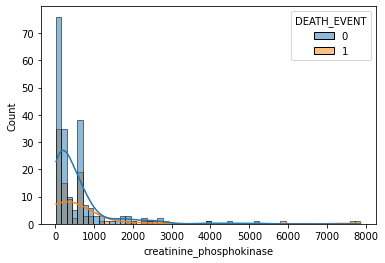

In [ ]:
sns.histplot(x='creatinine_phosphokinase', data=dataset, hue='DEATH_EVENT', kde=True)
plt.show()

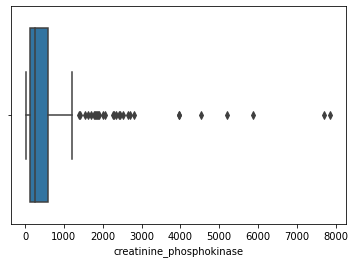

In [ ]:
sns.boxplot(dataset['creatinine_phosphokinase'])
plt.show()

이상치(outlier)가 많아서 Machine Learning에는 적합하지 않은 것 같다. 크레아티닌키아제의 정상농도는 50~250 사이이다.

4. diabetes(당뇨병 여부)와 DEATH

Death Rate of patients who have no diabetes: 0.3218390804597701
Death Rate of patients who have diabetes: 0.32


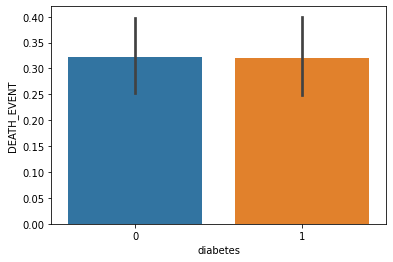

In [ ]:
non_diabetes = dataset[dataset['diabetes']==0]['DEATH_EVENT'].mean()
have_diabetes = dataset[dataset['diabetes']==1]['DEATH_EVENT'].mean()

print("Death Rate of patients who have no diabetes: {}".format(non_diabetes))
print("Death Rate of patients who have diabetes: {}".format(have_diabetes))

sns.barplot(dataset['diabetes'], dataset['DEATH_EVENT'])
plt.show()

당뇨병이 없는 사람의 사망률이 더 높으며, 큰 차이 역시 없다. Machine Learning에 큰 도움은 안 될 것으로 예상.

5. ejection_fraction(박출계수)과 DEATH

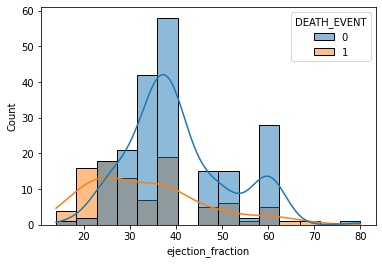

In [ ]:
sns.histplot(x='ejection_fraction', data=dataset, hue='DEATH_EVENT', kde=True)
plt.show()

ejection_fraction(박출계수)가 낮을수록 사망률이 더 높다.

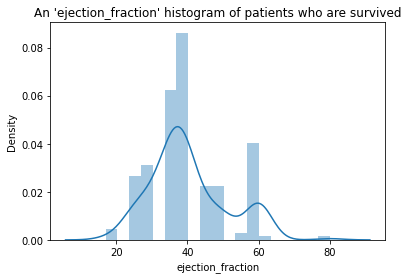

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==0]['ejection_fraction'])
plt.title("An 'ejection_fraction' histogram of patients who are survived")
plt.show()

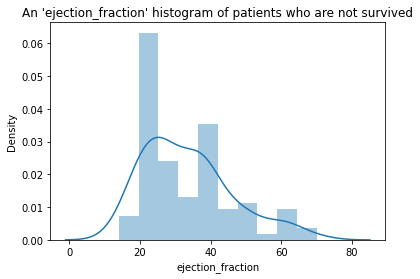

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==1]['ejection_fraction'])
plt.title("An 'ejection_fraction' histogram of patients who are not survived")
plt.show()

6. high_blood_pressure(고혈압 여부)와 DEATH

Death Rate of patients who have no high blood pressure: 0.3251231527093596
Death Rate of patients who have high blood pressure: 0.40625


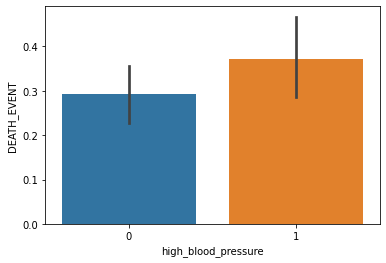

In [ ]:
non_pressure = dataset[dataset['DEATH_EVENT']==0]['high_blood_pressure'].mean()
have_pressure = dataset[dataset['DEATH_EVENT']==1]['high_blood_pressure'].mean()

print("Death Rate of patients who have no high blood pressure: {}".format(non_pressure))
print("Death Rate of patients who have high blood pressure: {}".format(have_pressure))

sns.barplot(dataset['high_blood_pressure'], dataset['DEATH_EVENT'])
plt.show()

고혈압 증세가 있는 환자의 사망률이 더 높다.

7. platelets(혈소판의 수)와 DEATH

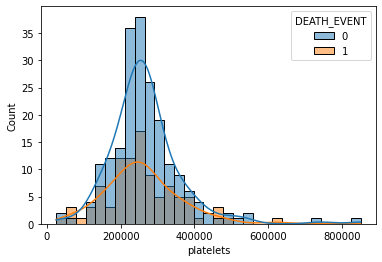

In [ ]:
sns.histplot(x='platelets', data=dataset, hue='DEATH_EVENT', kde=True)
plt.show()

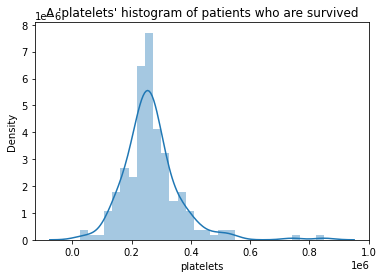

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==0]['platelets'])
plt.title("A 'platelets' histogram of patients who are survived")
plt.show()

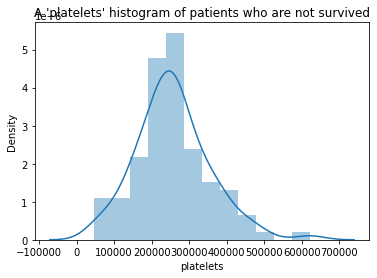

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==1]['platelets'])
plt.title("A 'platelets' histogram of patients who are not survived")
plt.show()

Machine Learning에 큰 도움은 안 되는 듯 보인다.

8. serum_creatinine(혈중 크레아티닌 수치)과 DEATH

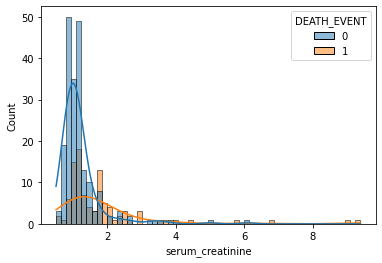

In [ ]:
sns.histplot(x='serum_creatinine', data=dataset, hue='DEATH_EVENT', kde=True)
plt.show()

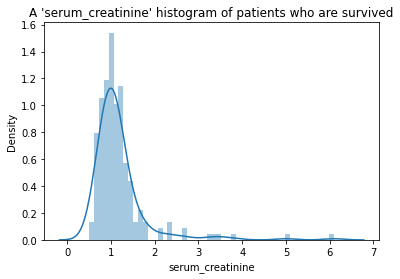

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==0]['serum_creatinine'])
plt.title("A 'serum_creatinine' histogram of patients who are survived")
plt.show()

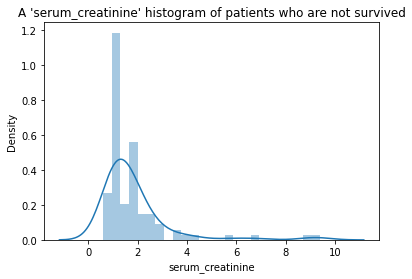

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==1]['serum_creatinine'])
plt.title("A 'serum_creatinine' histogram of patients who are not survived")
plt.show()

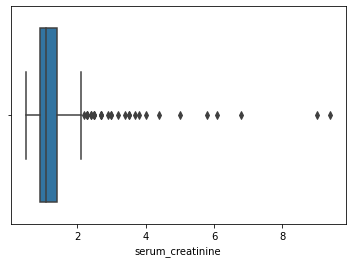

In [ ]:
sns.boxplot(dataset['serum_creatinine'])
plt.show()

마찬가지로 이상치(outlier)가 많아서 Machine Learning에는 적합하지 않은 것 같다. 혈중 크레아티닌의 정상농도는 0.5~1.4 사이이다.

9. serum_sodium(혈중 나트륨 수치)과 DEATH

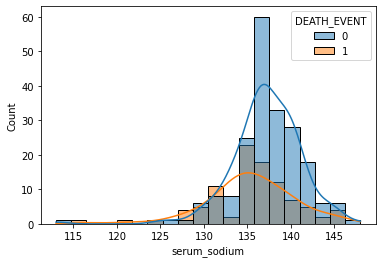

In [ ]:
sns.histplot(x='serum_sodium', data=dataset, hue='DEATH_EVENT', kde=True)
plt.show()

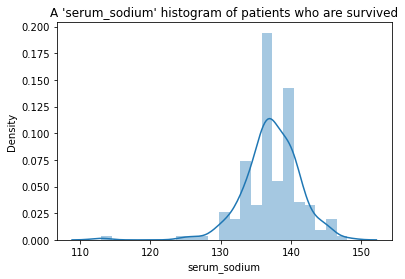

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==0]['serum_sodium'])
plt.title("A 'serum_sodium' histogram of patients who are survived")
plt.show()

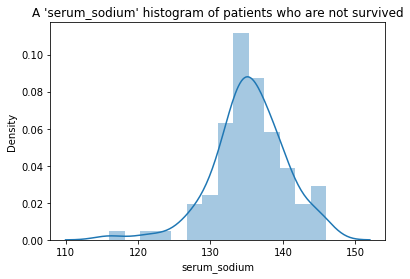

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==1]['serum_sodium'])
plt.title("A 'serum_sodium' histogram of patients who are not survived")
plt.show()

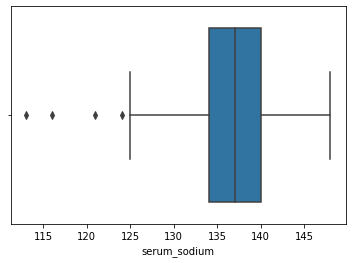

In [ ]:
sns.boxplot(dataset['serum_sodium'])
plt.show()

혈중 나트륨 수치가 낮을수록 사망률이 더 높았다. 혈중 나트륨의 정상 수치는 136~145 사이이다.

10. sex(0: 여자, 1: 남자)와 DEATH

Death Rate of female patients: 0.3238095238095238
Death Rate of male patients: 0.31958762886597936


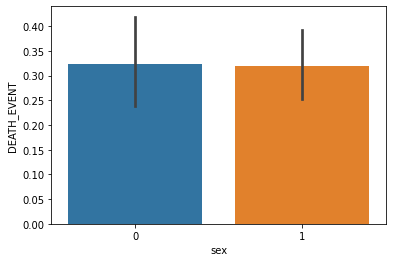

In [ ]:
death_female = dataset[dataset['sex']==0]['DEATH_EVENT'].mean()
death_male = dataset[dataset['sex']==1]['DEATH_EVENT'].mean()

print("Death Rate of female patients: {}".format(death_female))
print("Death Rate of male patients: {}".format(death_male))

sns.barplot(dataset['sex'], dataset['DEATH_EVENT'])
plt.show()

11. smoking(흡연 여부)과 DEATH

Death Rate of patients who do not smoking: 0.3251231527093596
Death Rate of patients who do smoking: 0.3125


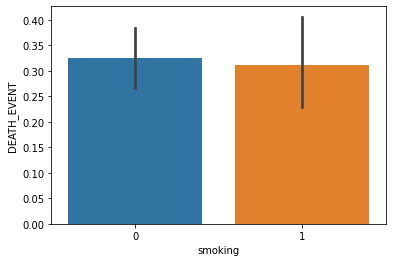

In [ ]:
non_smoking = dataset[dataset['DEATH_EVENT']==0]['smoking'].mean()
do_smoking = dataset[dataset['DEATH_EVENT']==1]['smoking'].mean()

print("Death Rate of patients who do not smoking: {}".format(non_smoking))
print("Death Rate of patients who do smoking: {}".format(do_smoking))

sns.barplot(dataset['smoking'], dataset['DEATH_EVENT'])
plt.show()

비흡연 환자의 사망률이 더 높다.

12. time(관찰 기간)과 DEATH

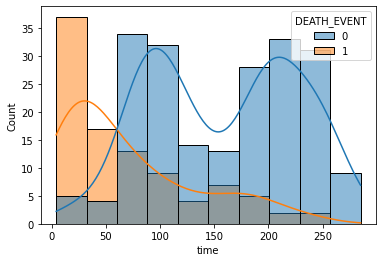

In [ ]:
sns.histplot(x='time', data=dataset, hue='DEATH_EVENT', kde=True)
plt.show()

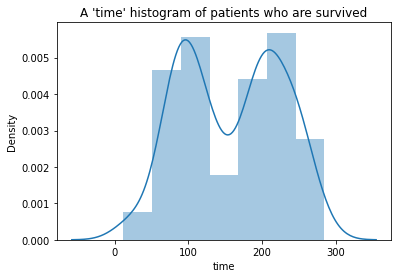

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==0]['time'])
plt.title("A 'time' histogram of patients who are survived")
plt.show()

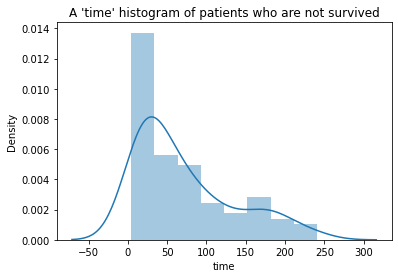

In [ ]:
sns.distplot(dataset[dataset['DEATH_EVENT']==1]['time'])
plt.title("A 'time' histogram of patients who are not survived")
plt.show()

관측 기간이 짧을수록 사망률이 더 높았다.

# 학습 준비

데이터 전처리

In [ ]:
X_num = dataset[['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = dataset[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
Y = dataset['DEATH_EVENT']

scaler = StandardScaler() 
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

standardscaler를 이용하여 스케일을 조정. 평균은 0, 표준편차는 1(표준정규분포)이 된다.

In [ ]:
X.head(n=10)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
5,2.456114,-0.552141,0.162199,-6.079240e-01,0.683709,-1.050016,1,0,1,1,1
6,1.192945,-0.346704,-1.953749,-1.396531e+00,-0.187726,0.085034,1,0,0,1,0
7,-0.070223,-0.275472,1.854958,1.952488e+00,-0.284552,-1.277026,1,1,0,1,1
8,0.350833,-0.438583,2.278147,7.535660e-09,0.102752,0.312044,0,0,0,0,0
9,1.614001,-0.473683,-0.260991,1.276539e+00,7.752020,-0.823006,1,0,1,1,1


전체 데이터를 학습 set과 테스트 set으로 분리

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=123)

## Machine Learning

1. Gradient Boosting Machine model

In [ ]:
gradient_boosting = GradientBoostingClassifier()

gradient_boosting.fit(X_train, Y_train)

Y_pred = gradient_boosting.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76        59
           1       0.65      0.42      0.52        40

    accuracy                           0.68        99
   macro avg       0.67      0.64      0.64        99
weighted avg       0.67      0.68      0.66        99



2. RandomForest model

In [ ]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74        59
           1       0.59      0.33      0.42        40

    accuracy                           0.64        99
   macro avg       0.62      0.59      0.58        99
weighted avg       0.63      0.64      0.61        99



3. LogisticRegression model

In [ ]:
logreg = LogisticRegression(max_iter=1000) # 학습 반복

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        59
           1       0.75      0.38      0.50        40

    accuracy                           0.70        99
   macro avg       0.72      0.65      0.64        99
weighted avg       0.71      0.70      0.67        99



데이터 99개로 평가했을 때, 정확도가 70%라는 뜻이다.

4. Gaussian Naive Bayes model

In [ ]:
GNB = GaussianNB()

GNB.fit(X_train, Y_train)

Y_pred = GNB.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78        59
           1       0.82      0.23      0.35        40

    accuracy                           0.67        99
   macro avg       0.73      0.60      0.56        99
weighted avg       0.72      0.67      0.60        99



5. KNN model

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.88      0.73        59
           1       0.56      0.23      0.32        40

    accuracy                           0.62        99
   macro avg       0.59      0.55      0.53        99
weighted avg       0.60      0.62      0.57        99



6. SVM model

In [ ]:
svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76        59
           1       0.67      0.25      0.36        40

    accuracy                           0.65        99
   macro avg       0.65      0.58      0.56        99
weighted avg       0.65      0.65      0.60        99



7. Decision Tree model

In [ ]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73        59
           1       0.61      0.57      0.59        40

    accuracy                           0.68        99
   macro avg       0.66      0.66      0.66        99
weighted avg       0.67      0.68      0.68        99



# 한계와 문제점?

1. 'serum_creatinine'의 경우, 이상치가 매우 많았음에도 불구하고 그 상태 그대로 모델 학습에 적용됨. >> 이상치를 지닌 데이터를 일부 제외시키거나 데이터의 평균값으로 대체하는 방안.

2. 모델의 정확도 낮음. 정확도가 80%를 넘는 모델이 하나도 없었음. 정확도를 높이기 위해 무엇을 해야하는가?

3. 열의 성분 일부를 제외했을 때, 일부 모델의 정확도가 높아짐.

# 신경망 구현

In [ ]:
import tensorflow as tf
import keras

from keras import layers
from sklearn.metrics import confusion_matrix, accuracy_score
from keras import Sequential

In [ ]:
# ann 인풋
ann = tf.keras.models.Sequential()

In [ ]:
# 첫번째 은닉층 
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

# 두번째 은닉층
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))

# 세번째 은닉층
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

# ann 아웃풋
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
%%time
# ann 컴파일
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ann 학습
ann.fit(X_train, Y_train, batch_size=5, epochs=75) # 5개 집단을 75씩 학습

Epoch 1/75
40/40 [==============================] - 1s 2ms/step - loss: 0.6711 - accuracy: 0.6900
Epoch 2/75
40/40 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7050
Epoch 3/75
40/40 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7200
Epoch 4/75
40/40 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.7250
Epoch 5/75
40/40 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.7250
Epoch 6/75
40/40 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7250
Epoch 7/75
40/40 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.7250
Epoch 8/75
40/40 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7250
Epoch 9/75
40/40 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7300
Epoch 10/75
40/40 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7350
Epoch 11/75
40/40 [

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (5, 8)                    96        
                                                                 
 dense_9 (Dense)             (5, 9)                    81        
                                                                 
 dense_10 (Dense)            (5, 8)                    80        
                                                                 
 dense_11 (Dense)            (5, 1)                    9         
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


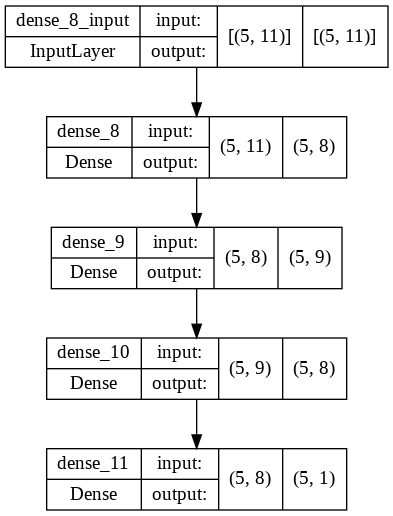

In [ ]:
ann.summary()
tf.keras.utils.plot_model(ann, to_file='ann_plot.png', show_shapes=True)

In [ ]:
# 테스트셋 결과 예측
Y_pred = ann.predict(X_test)
Y_pred = (Y_pred > 0.5)

# confusion matrix 만들기
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("Accuracy: {}".format(accuracy_score(Y_test, Y_pred)))

[[50  9]
 [21 19]]
Accuracy: 0.696969696969697


# ROC curve

In [ ]:
from sklearn.metrics import roc_curve

(1) Gradient Boosting

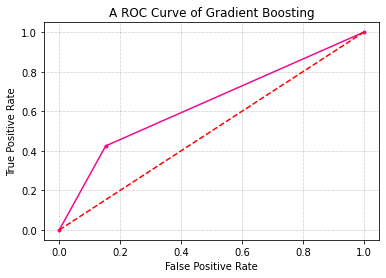

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = gradient_boosting.predict(X_test)
FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR, marker='.', color=np.random.rand(3,))
plt.plot([0,1],[0,1],'--',color='red')
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('A ROC Curve of Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

(2) Random Forest

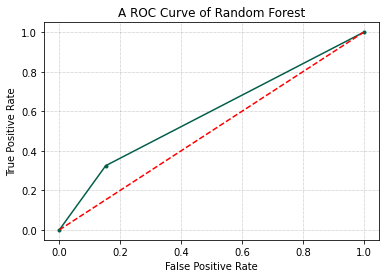

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = random_forest.predict(X_test)
FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR, marker='.', color=np.random.rand(3,))
plt.plot([0,1],[0,1],'--',color='red')
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('A ROC Curve of Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

(3) Logistic Regression

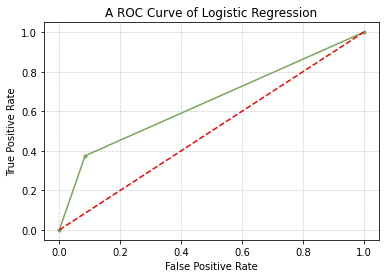

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = logreg.predict(X_test)
FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR, marker='.', color=np.random.rand(3,))
plt.plot([0,1],[0,1],'--', color='red')
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('A ROC Curve of Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

(4) Gaussian Naive Bayes

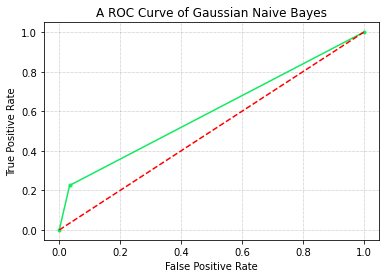

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = GNB.predict(X_test)
FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR, marker='.', color=np.random.rand(3,))
plt.plot([0,1],[0,1],'--', color='red')
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('A ROC Curve of Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

(5) KNN

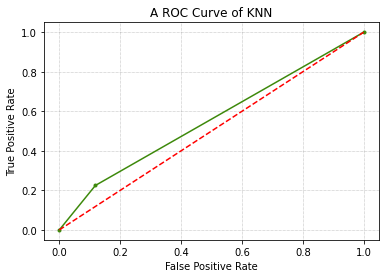

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = knn.predict(X_test)
FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR, marker='.', color=np.random.rand(3,))
plt.plot([0,1],[0,1],'--', color='red')
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('A ROC Curve of KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

(6) SVM

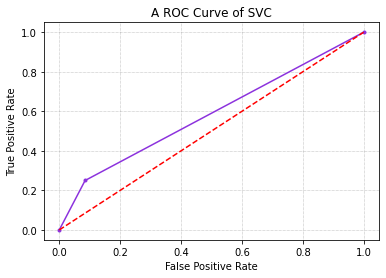

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = svc.predict(X_test)
FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR, marker='.', color=np.random.rand(3,))
plt.plot([0,1],[0,1],'--', color='red')
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('A ROC Curve of SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

(7) Decision Tree

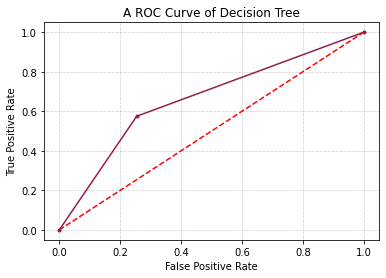

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = decision_tree.predict(X_test)
FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR, marker='.', color=np.random.rand(3,))
plt.plot([0,1],[0,1],'--', color='red')
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('A ROC Curve of Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

(8) Artificial Neural Networks

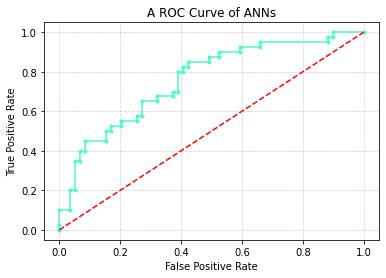

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = ann.predict(X_test)
FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR, marker='.', color=np.random.rand(3,))
plt.plot([0,1],[0,1],'--', color='red')
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('A ROC Curve of ANNs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

# Precision Recall curve & AUC

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

(1) Gradient Boosting

AUC score of Gradient Boosting: 0.655584693084693


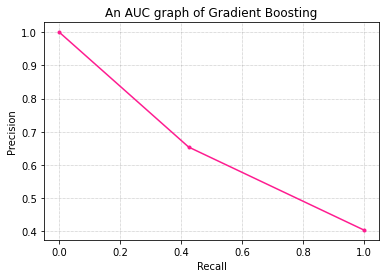

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = gradient_boosting.predict(X_test)
precision, recall, _ = precision_recall_curve(Y_test, Y_test_pred_probs)
auc_score = auc(recall, precision)
print('AUC score of Gradient Boosting: {}'.format(auc_score))

plt.plot(recall, precision, marker='.', color=np.random.rand(3,))
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('An AUC graph of Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
plt.clf()

(2) Random Forest

AUC score of Random Forest: 0.594318181818182


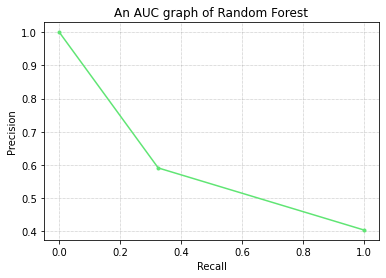

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = random_forest.predict(X_test)
precision, recall, _ = precision_recall_curve(Y_test, Y_test_pred_probs)
auc_score = auc(recall, precision)
print('AUC score of Random Forest: {}'.format(auc_score))

plt.plot(recall, precision, marker='.', color=np.random.rand(3,))
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('An AUC graph of Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
plt.clf()

(3) Logistic Regression

AUC score of Logistic Regression: 0.6887626262626263


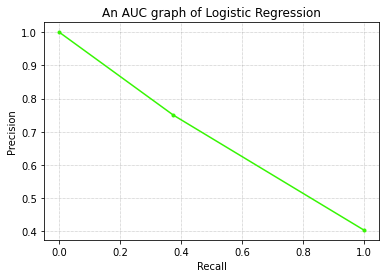

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = logreg.predict(X_test)
precision, recall, _ = precision_recall_curve(Y_test, Y_test_pred_probs)
auc_score = auc(recall, precision)
print('AUC score of Logistic Regression: {}'.format(auc_score))

plt.plot(recall, precision, marker='.', color=np.random.rand(3,))
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('An AUC graph of Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
plt.clf()

(4) Gaussian Naive Bayes

AUC score of Gaussian Naive Bayes: 0.6781565656565657


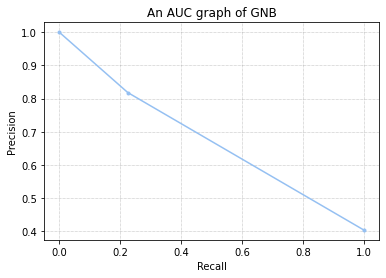

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = GNB.predict(X_test)
precision, recall, _ = precision_recall_curve(Y_test, Y_test_pred_probs)
auc_score = auc(recall, precision)
print('AUC score of Gaussian Naive Bayes: {}'.format(auc_score))

plt.plot(recall, precision, marker='.', color=np.random.rand(3,))
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('An AUC graph of GNB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
plt.clf()

(5) KNN

AUC score of K-Nearest Neighbor: 0.5503156565656566


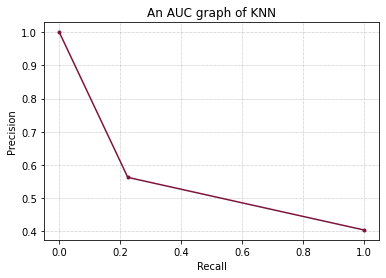

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = knn.predict(X_test)
precision, recall, _ = precision_recall_curve(Y_test, Y_test_pred_probs)
auc_score = auc(recall, precision)
print('AUC score of K-Nearest Neighbor: {}'.format(auc_score))

plt.plot(recall, precision, marker='.', color=np.random.rand(3,))
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('An AUC graph of KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
plt.clf()

(6) SVM

AUC score of Support Vecotr Machine: 0.6098484848484849


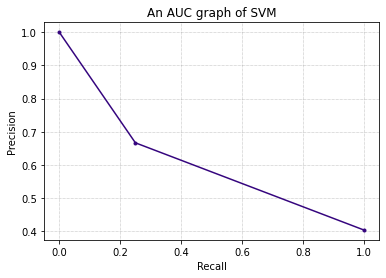

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = svc.predict(X_test)
precision, recall, _ = precision_recall_curve(Y_test, Y_test_pred_probs)
auc_score = auc(recall, precision)
print('AUC score of Support Vecotr Machine: {}'.format(auc_score))

plt.plot(recall, precision, marker='.', color=np.random.rand(3,))
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('An AUC graph of SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
plt.clf()

(7) Decision Tree

AUC score of Decision Tree: 0.6759901648059543


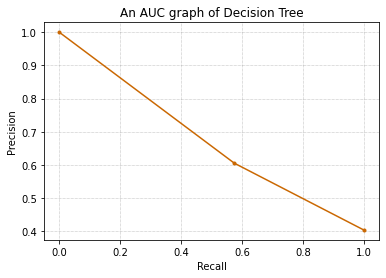

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = decision_tree.predict(X_test)
precision, recall, _ = precision_recall_curve(Y_test, Y_test_pred_probs)
auc_score = auc(recall, precision)
print('AUC score of Decision Tree: {}'.format(auc_score))

plt.plot(recall, precision, marker='.', color=np.random.rand(3,))
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('An AUC graph of Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
plt.clf()

(8) Artificial Neural Networks

AUC score of Artificial Neural Networks: 0.6838799340526811


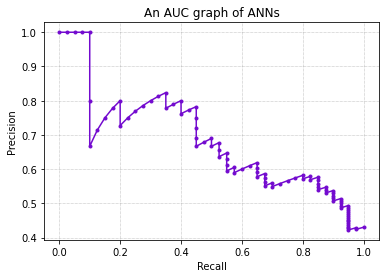

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_test_pred_probs = ann.predict(X_test)
precision, recall, _ = precision_recall_curve(Y_test, Y_test_pred_probs)
auc_score = auc(recall, precision)
print('AUC score of Artificial Neural Networks: {}'.format(auc_score))

plt.plot(recall, precision, marker='.', color=np.random.rand(3,))
plt.grid(color='gray', linestyle=':', linewidth=0.5)

plt.title('An AUC graph of ANNs')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
plt.clf()